<a href="https://colab.research.google.com/github/shabanakausar/shabanakausar/blob/main/movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import imdb


In [23]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data( num_words= 10000)                            

In [24]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [25]:
train_labels[0]

1

In [26]:
# Restrict to the top 10,000 most frequent words, no word index will exceed 10,000.
max([max(sequence) for sequence in train_data])

9999

In [27]:
#-----for kicks, quickly decade one of these reviews back to English words

word_index =imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])

In [28]:
decoded_review = ''.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"?thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert?isanamazingactorandnowthesamebeingdirector?fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor?andwouldrecommendittoeveryonetowatchandtheflyfishingwasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso?tothetwolittleboy'sthatplayedthe?ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe?listithinkbecausethestarsthatplaythemallgrownuparesuchabigprofileforthewholefilmbutthesechildrenareamazingandshouldbepraisedforwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwassharedwithusall"

In [29]:
#---------------Encoding the integer sequences into a binary matrix
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results


In [30]:
x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [31]:
#---------------Vectorize the Labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [32]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [33]:
#-------------------The model definition
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [34]:
#---------------------------compile the model-----------
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [35]:
#----------------------------Configuring the optimizers--------------
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [36]:
#------------------------------Using custom losses and metrics---------------
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [37]:
#-----------------------Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [38]:
#-------------------------Training the model
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.5278 - acc: 0.7883 - val_loss: 0.3997 - val_acc: 0.8732
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3171 - acc: 0.9035 - val_loss: 0.3196 - val_acc: 0.8829
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2314 - acc: 0.9267 - val_loss: 0.3070 - val_acc: 0.8779
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1801 - acc: 0.9424 - val_loss: 0.3153 - val_acc: 0.8738
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1457 - acc: 0.9541 - val_loss: 0.2933 - val_acc: 0.8849
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1221 - acc: 0.9620 - val_loss: 0.2914 - val_acc: 0.8854
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1017 - acc: 0.9701 - val_loss: 0.3055 - val_acc: 0.8835
Epoch 8/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0820 - a

In [39]:
#------------------Plotting the training and validation loss
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

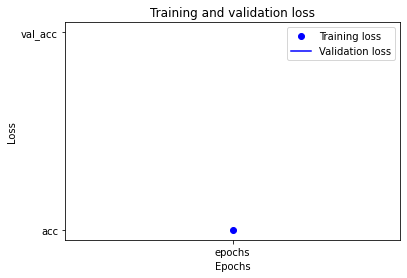

In [40]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len('acc') + 1)
plt.plot('epochs', 'acc', 'bo', label='Training loss')
plt.plot('epochs', 'val_acc', 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




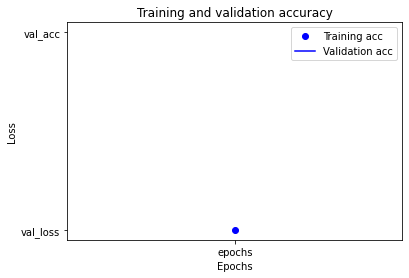

In [41]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot('epochs', 'val_loss', 'bo', label='Training acc')
plt.plot('epochs', 'val_acc', 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()